In [ ]:
#To load data
import numpy as np
#Data visualization
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MaxNLocator
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cmocean
import cmath

In [ ]:
#total A3
harmonicA3 = np.loadtxt('/Users/19082/Desktop/shane/harmonics_data/A3')

#monthly A3
janA3 = np.loadtxt('/Users/19082/Desktop/shane/harmonics_data/januaryA3')
febA3 = np.loadtxt('/Users/19082/Desktop/shane/harmonics_data/februaryA3')
marA3 = np.loadtxt('/Users/19082/Desktop/shane/harmonics_data/marchA3')
aprA3 = np.loadtxt('/Users/19082/Desktop/shane/harmonics_data/aprilA3')
mayA3 = np.loadtxt('/Users/19082/Desktop/shane/harmonics_data/mayA3')
junA3 = np.loadtxt('/Users/19082/Desktop/shane/harmonics_data/juneA3')
julA3 = np.loadtxt('/Users/19082/Desktop/shane/harmonics_data/julyA3')
augA3 = np.loadtxt('/Users/19082/Desktop/shane/harmonics_data/augustA3')
sepA3 = np.loadtxt('/Users/19082/Desktop/shane/harmonics_data/septemberA3')
octA3 = np.loadtxt('/Users/19082/Desktop/shane/harmonics_data/octoberA3')
novA3 = np.loadtxt('/Users/19082/Desktop/shane/harmonics_data/novemberA3')
decA3 = np.loadtxt('/Users/19082/Desktop/shane/harmonics_data/decemberA3')

In [ ]:
# Declare bins
lon = np.linspace(-180, 180, 360*2)
lat = np.linspace(-90, 90, 180*2)

Total A3:

Text(0.5, 0, '($^\\circ$C)')

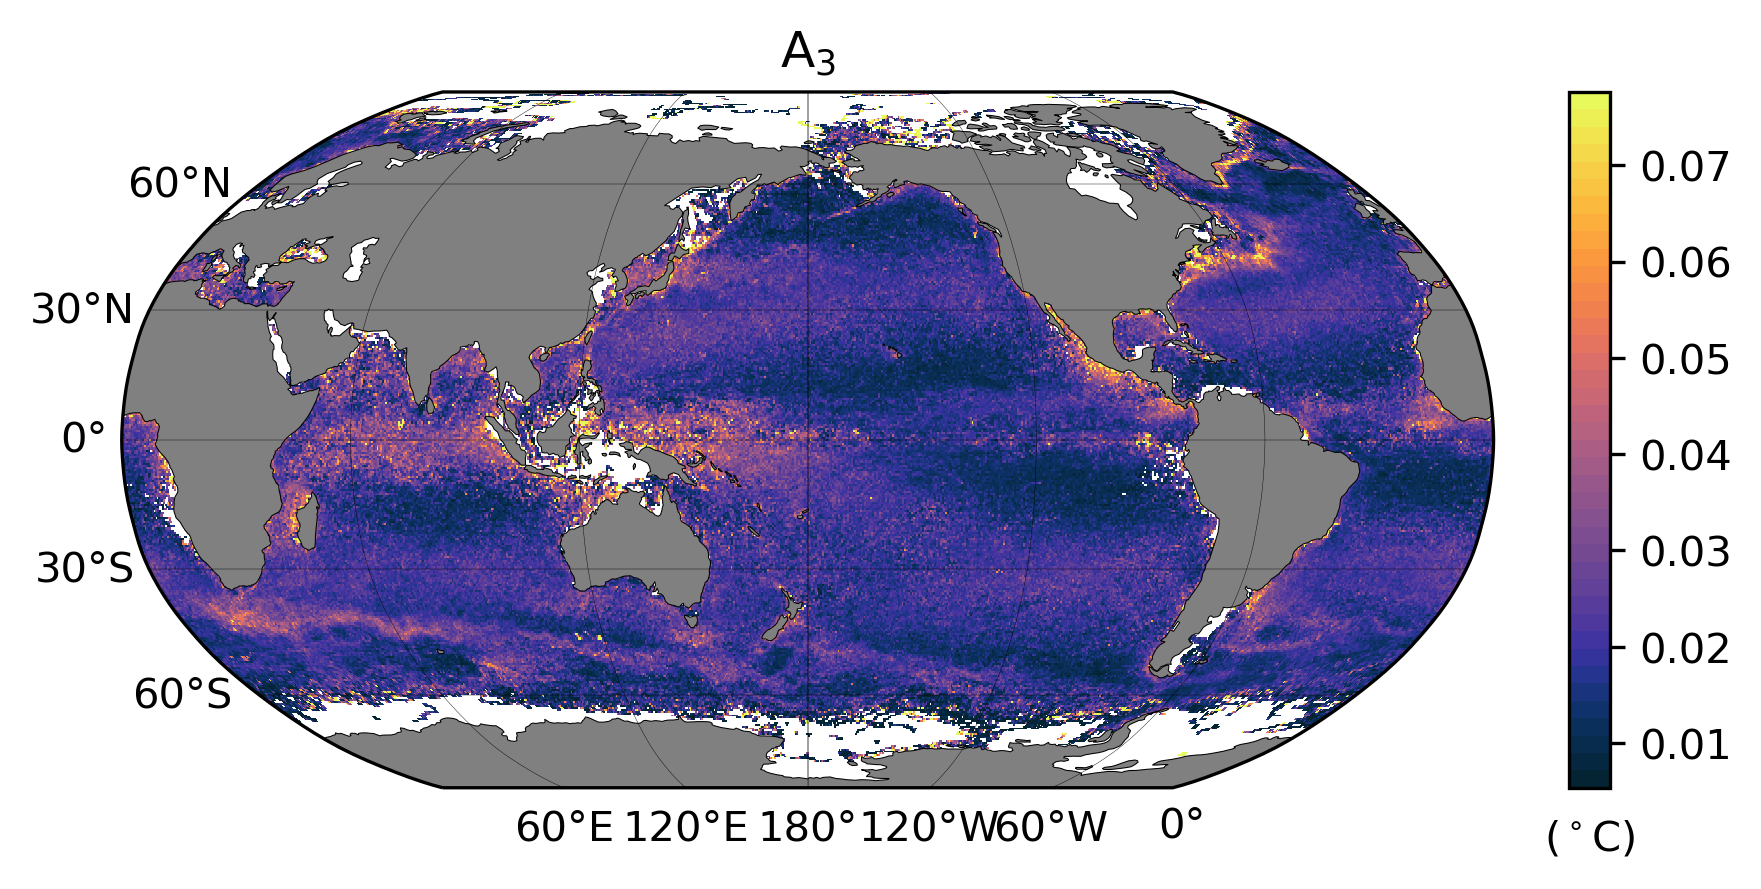

In [ ]:
x_c = np.convolve(lon, [0.5, 0.5], mode='valid')
y_c = np.convolve(lat, [0.5, 0.5], mode='valid')

a1, a2 = np.nanpercentile(harmonicA3,[1,99])

cmap = plt.cm.get_cmap("cmo.thermal", 40)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=-180))
pcm = ax.pcolormesh(x_c, y_c, 
                    harmonicA3,
                    cmap= cmap,
                    transform=ccrs.PlateCarree(),
                    vmin=a1, vmax=a2)

# gridlines and labels
gl = ax.gridlines(color='k', linewidth=0.1, linestyle='-',
                  xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# add land and coastline
ax.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.25, axes_class=plt.Axes)
cb = fig.colorbar(pcm, cax=cax, orientation = "vertical");
ax.set_title('A$_3$',);
cb.ax.set_xlabel("($^\circ$C)")